In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# Load the data
oecd_bli = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")


In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


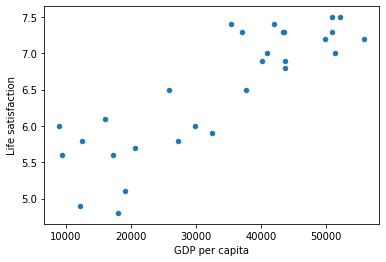

In [5]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


In [7]:
# Select a linear model

from sklearn.model_selection import train_test_split
auto_X_train, auto_X_test, auto_Y_train, auto_Y_test = train_test_split(X, y, test_size=0.2, random_state=4)

plt.scatter()

In [38]:
# Train the model



In [39]:
# Make a prediction for Cyprus


In [8]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ TV', data=country_stats)
model = model.fit()

PatsyError: Error evaluating factor: NameError: name 'Sales' is not defined
    Sales ~ TV
    ^^^^^